<a href="https://colab.research.google.com/github/alessandrobruno10/etxcp/blob/main/colour_spaces_and_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Let's get python libraries installed
!pip install scikit-image
!pip install opencv-python
!pip install matplotlib

FileUpload(value={}, accept='image/*', description='Upload')

Failed to decode the image mermaid-diagram-2024-05-21-000432.svg


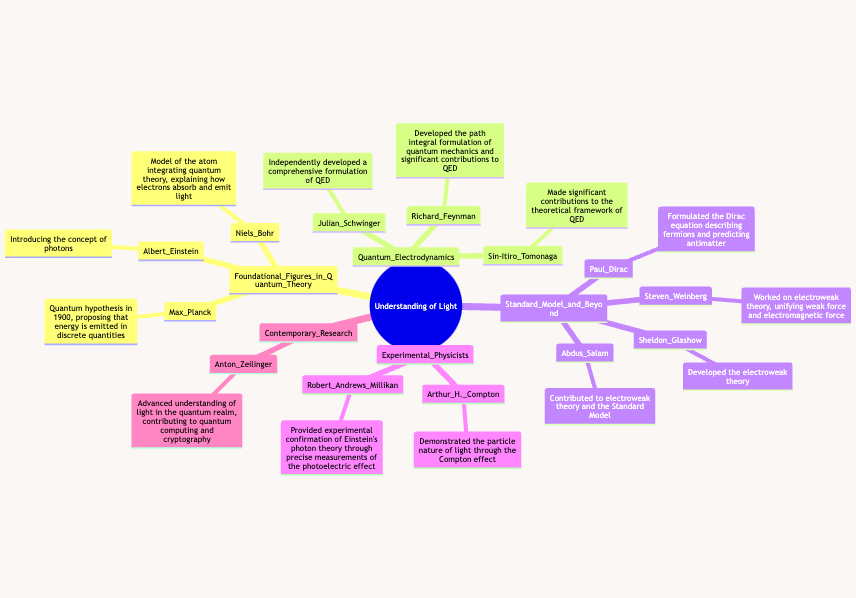

In [13]:
import ipywidgets as widgets
from IPython.display import display
import cv2
import numpy as np
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Create a FileUpload widget that accepts image files
uploader = widgets.FileUpload(
    accept='image/*',  # Accepts image files only
    multiple=False  # Set to False to upload only one image at a time
)

def rgb_to_cmyk(image_rgb):
    # Normalize the RGB values
    image_rgb = image_rgb.astype(float) / 255.0
    K = 1 - np.max(image_rgb, axis=2)
    C = (1 - image_rgb[..., 0] - K) / (1 - K + 1e-10)
    M = (1 - image_rgb[..., 1] - K) / (1 - K + 1e-10)
    Y = (1 - image_rgb[..., 2] - K) / (1 - K + 1e-10)
    C[np.isnan(C)] = 0
    M[np.isnan(M)] = 0
    Y[np.isnan(Y)] = 0
    CMYK = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)
    return CMYK

def convert_and_display(image_rgb):
    # Convert to different color spaces
    im_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    im_hsl = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HLS)
    im_CIE_Lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Lab)
    im_CIE_Luv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Luv)
    im_CMYK = rgb_to_cmyk(image_rgb)

    # Create output widgets for each color space
    output_rgb = widgets.Output()
    output_hsv = widgets.Output()
    output_hsl = widgets.Output()
    output_lab = widgets.Output()
    output_luv = widgets.Output()
    output_cmyk = widgets.Output()

    # Function to plot images in a specific output widget
    def plot_images(output_widget, image, channels, titles):
        with output_widget:
            fig, axes = plt.subplots(1, len(channels) + 1, figsize=(16, 4))
            axes[0].imshow(image)
            axes[0].set_title('Original Image')
            axes[0].axis('off')
            for i, (channel, title) in enumerate(zip(channels, titles)):
                axes[i + 1].imshow(channel, cmap='gray')
                axes[i + 1].set_title(title)
                axes[i + 1].axis('off')
            plt.show()

    # Plot each color space in its respective output widget
    plot_images(output_rgb, image_rgb, [image_rgb[:, :, i] for i in range(3)], ['Red', 'Green', 'Blue'])
    plot_images(output_hsv, cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB), [im_hsv[:, :, i] for i in range(3)], ['Hue', 'Saturation', 'Value'])
    plot_images(output_hsl, cv2.cvtColor(im_hsl, cv2.COLOR_HLS2RGB), [im_hsl[:, :, i] for i in range(3)], ['Hue', 'Lightness', 'Saturation'])
    plot_images(output_lab, cv2.cvtColor(im_CIE_Lab, cv2.COLOR_Lab2RGB), [im_CIE_Lab[:, :, i] for i in range(3)], ['L*', 'a*', 'b*'])
    plot_images(output_luv, cv2.cvtColor(im_CIE_Luv, cv2.COLOR_Luv2RGB), [im_CIE_Luv[:, :, i] for i in range(3)], ['L*', 'u*', 'v*'])
    plot_images(output_cmyk, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR), [im_CMYK[:, :, i] for i in range(4)], ['Cyan', 'Magenta', 'Yellow', 'Black'])

    # Display the output widgets
    display(widgets.VBox([output_rgb, output_hsv, output_hsl, output_lab, output_luv, output_cmyk]))

def display_uploaded_image(uploader):
    for uploaded_filename in uploader.value:
        content = uploader.value[uploaded_filename]['content']
        nparr = np.frombuffer(content, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Failed to decode the image {uploaded_filename}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display_img = PILImage.fromarray(img_rgb)
        display(display_img)
        convert_and_display(img_rgb)
        return(img_rgb)

# Connect the file upload event to the display function
uploader.observe(lambda change: display_uploaded_image(uploader), names='value')

# Display the uploader widget
out = display(uploader)


In [14]:
print(type(out))

<class 'NoneType'>


FileUpload(value={}, accept='image/*', description='Upload')

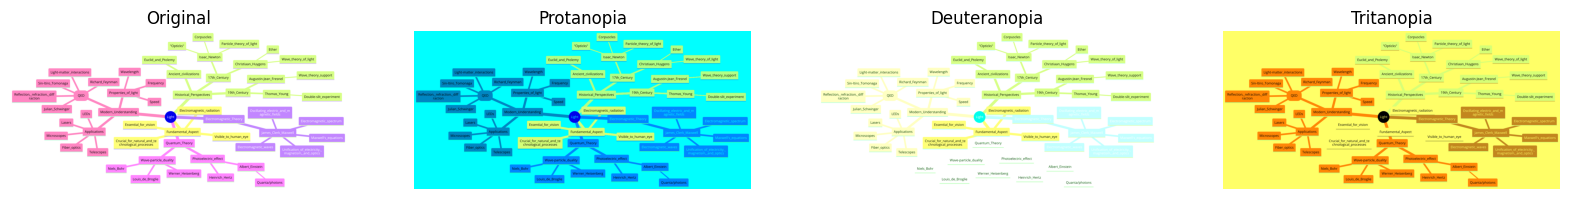

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image as PILImage

# Function to simulate color blindness
def simulate_color_blindness(image, blindness_type):
    """
    Simulate color blindness on an RGB image.

    :param image: Input RGB image as a NumPy array.
    :param blindness_type: Type of color blindness ('protanopia', 'deuteranopia', 'tritanopia').
    :return: Simulated RGB image.
    """
    # Define the transformation matrices for each type of color blindness
    if blindness_type == 'protanopia':
        matrix = np.array([[0.0, 2.02344, -2.52581],
                           [0.0, 1.0, 0.0],
                           [0.0, 0.0, 1.0]])
    elif blindness_type == 'deuteranopia':
        matrix = np.array([[1.0, 0.0, 0.0],
                           [0.494207, 0.0, 1.24827],
                           [0.0, 0.0, 1.0]])
    elif blindness_type == 'tritanopia':
        matrix = np.array([[1.0, 0.0, 0.0],
                           [0.0, 1.0, 0.0],
                           [-0.395913, 0.801109, 0.0]])
    else:
        raise ValueError("Invalid color blindness type. Choose from 'protanopia', 'deuteranopia', or 'tritanopia'.")

    # Apply the transformation matrix to each pixel
    transformed_image = np.dot(image, matrix.T)

    # Clip the values to be in the valid range [0, 255]
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

    return transformed_image

# Function to display the original and simulated images
def display_simulated_images(image):
    # Simulate the different types of color blindness
    protanopia_image = simulate_color_blindness(image, 'protanopia')
    deuteranopia_image = simulate_color_blindness(image, 'deuteranopia')
    tritanopia_image = simulate_color_blindness(image, 'tritanopia')

    # Display the original and simulated images
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(image)
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(protanopia_image)
    axes[1].set_title('Protanopia')
    axes[1].axis('off')

    axes[2].imshow(deuteranopia_image)
    axes[2].set_title('Deuteranopia')
    axes[2].axis('off')

    axes[3].imshow(tritanopia_image)
    axes[3].set_title('Tritanopia')
    axes[3].axis('off')

    plt.show()

# Function to handle file upload and display
def on_upload_change(change):
    for uploaded_filename in change['new']:
        content = uploader.value[uploaded_filename]['content']
        nparr = np.frombuffer(content, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Failed to decode the image {uploaded_filename}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display_simulated_images(img_rgb)

# Create a FileUpload widget that accepts image files
uploader = widgets.FileUpload(
    accept='image/*',  # Accepts image files only
    multiple=False  # Set to False to upload only one image at a time
)

# Connect the file upload event to the display function
uploader.observe(on_upload_change, names='value')

# Display the uploader widget
display(uploader)
